# Padrões e técnicas em visualização

Embora cada problema seja único, há alguns padrões que podemos usar para facilitar a visualização em muitos casos.

Usaremos os seguintes dados nesse notebook:

In [119]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [146]:
direto=pd.DataFrame([[x,2*x,x**2,random.randint(0,80),x+(2*x)+x**2] for x in range(0,900)],columns=['a','b','c','d','l'])
titanic=pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [150]:
#Primeiro convertemos as espécies para números
speciesid=0
speciesset=set()
for flower in iris['species']:
    speciesset.add(flower)
specii={}
for i,species in enumerate(speciesset):
    specii[species]=i
iris['species']=iris['species'].apply(lambda x:specii[x])

titanic['Sex']=titanic['Sex'].apply(lambda x:1 if x=='female' else 0)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


### Tabelas e pré-visualização
A biblioteca pandas oferece algumas ferramentas úteis para visualizar rapidamente informações sobre os dados antes de fazermos qualquer gráfico.
 
Podemos obter uma descrição geral dos dados com os comandos `describe` e `info`

In [121]:
titanic.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


In [122]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    int64  
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.6+ KB


### Dados Cumulativos

Plots utilizados:
* line plot
    * Referência no [matplotlib](./matplotlib.ipynb#criando_um_plot)

Uma maneira interessante de encontrar padrões intuitivamente em conjuntos de dados é a técnica de ordenar os dados de acordo com um campo e visualizar os dados acumulados de outro (ou o mesmo).

Os DataFrames da biblioteca pandas possuem a função `DataFrame.cumsum()`, que faz exatamente isso.

Dessa forma, podemos encontrar mudanças de comportamento visualmente. Para entender melhor, analisemos o seguinte exemplo, que ordena os passageiros do Titanic por idade e visualiza o número acumulado de sobreviventes.

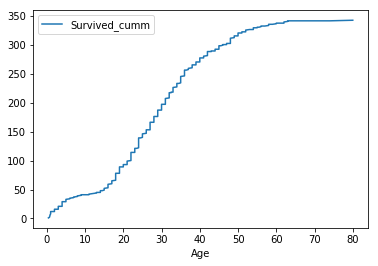

In [123]:
#reduce
import functools

sobr_por_idade=titanic[['Age','Survived']].sort_values(by='Age')
sobr_por_idade['Survived_cumm']=sobr_por_idade['Survived'].cumsum()
sobr_por_idade.plot(kind='line',x='Age',y='Survived_cumm')
plt.show()

Por esse gráfico conseguimos perceber que há uma quantidade significativamente maior de sobreviventes após uma idade entre 10 e 20 (provavelmente 18 anos).

Não podemos, porém, tirar a conclusão precipitada de que isso quer dizer que os mais velhos sobrevivem mais. A informação que o gráfico nos deu é apenas o que está literalmente escrito: há *mais sobreviventes mais velhos*.

Agora devemos gerar hipóteses sobre o que pode causar isso. Alguns exemplos:
* Todos sobrevivem com chances iguais, mas há um aumento na frequência das idades acima de 18
* Os mais velhos sobrevivem mais, e a frequência das idades é homogênea

Para testá-las, usaremos as técnicas da próxima secção.

### Valores relativos

Plots utilizados:
* line plot
    * Referência no [matplotlib](./matplotlib.ipynb#criando_um_plot)

Ás vezes, como na situação acima, o valor acumulado absoluto de um campo não tem muito significado. Isso acontece porque estamos querendo medir a mortalidade em cada idade, mas há quantidades diferentes de pessoas em cada classe de idade. Para resolver esse problema, podemos **agrupar** dados em classes (agrupar as idades em grupos de 5 anos, por exemplo) e calcular valores relativos a cada classe (taxa de sobrevivência para cada grupo).

Para isso podemos usar as funções `DataFrame.groupby()`, `DataFrame.agg()` e `DataFrame.apply()`, que, respectivamente:
* Agrupa resultados pelos valores de uma coluna (ou outros parâmetros), de modo que possamos aplicar funções por grupo ao invés de por aplicá-las por linha.
* Transforma várias linhas em uma só usando as funções especificadas (você pode somar, fazer média ou outras operações entre as linhas)
* Aplica uma função a todas as entradas de um DataFrame

In [124]:
sobr_por_idade=titanic[['Age','Survived']].sort_values(by='Age')

#Criamos uma coluna para contagem de pessoas
sobr_por_idade['Count']=1

#Dividimos em grupos de 5 em 5 anos
class_size=5
sobr_por_idade['AgeGroup']=((sobr_por_idade['Age']/class_size).apply(math.floor))*class_size

#Agrupamos por 'AgeGroup', somamos os membros de cada grupo e selecionamos as colunas 'Survived' e 'Count'
sobr_por_idade=sobr_por_idade.groupby('AgeGroup').agg(['sum'])[['Survived','Count']]

sobr_por_idade

,Survived,Count
,sum,sum
AgeGroup,,
0,29,43
5,12,28
10,7,18
15,41,110
20,50,158
25,48,135
30,46,112
35,37,87


De posse desse novo conjunto de dados, podemos agora calcular a taxa relativa de sobrevivência para cada idade e fazer um novo gráfico cumulativo que trará uma noção ainda melhor do que está acontecendo.

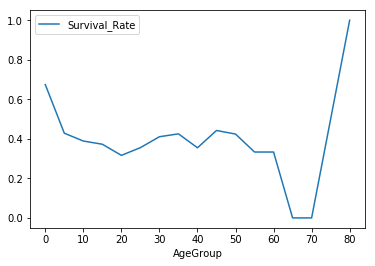

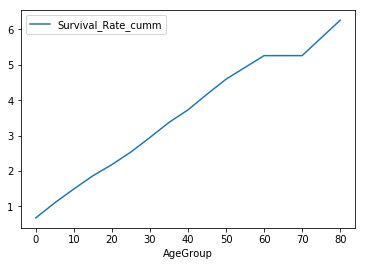

In [125]:
sobr_por_idade['Survival_Rate']=sobr_por_idade['Survived']['sum']/sobr_por_idade['Count']['sum']

sobr_por_idade['Survival_Rate_cumm']=sobr_por_idade['Survival_Rate'].cumsum()
sobr_por_idade.plot(kind='line',y='Survival_Rate')
plt.show()
sobr_por_idade.plot(kind='line',y='Survival_Rate_cumm')
plt.show()

E os gráficos nos mostram que na verdade a taxa de sobrevivência é bastante homogênea (nenhum grupo de idade tem uma chance maior de sobreviver)!

Agrupar dados e calcular valores relativos a cada grupo pode trazer muitas informações interessantes.

### Quando usar cada tipo de gráfico?

Gráficos são ferramentas muito poderosas, mas às vezes pode ser difícil decidir como usá-los, que tipo usar ou enxergar sua utilidade. Para auxiliar nisso, eis uma lista de algumas situações em que cada tipo de gráfico pode ser empregado.

#### Gráficos de linha (line plots)
* [Referência](./matplotlib.ipynb#criando_um_plot)

Gráficos de linha geralmente são utilizados para representar a evolução de uma variável à medida que alguma outra varia. Isso os faz ser muito úteis para visualizar _relações de 'dependência' entre **duas** variáveis/campos_.

Pontos a prestar atenção:

* Devido à natureza de medir "evolução", para um gráfico de linha fazer sentido visualmente, é necessário que haja uma progressão na variável que se usa como referência (x). Para tal, geralmente **ordenamos** o campo de referência. Dessa forma, podemos ver intuitivamente a evolução do gráfico.

Exemplos:
* Veja as secções acima para alguns usos interessantes para gŕaficos de linha.
* Abaixo, um exemplo de gráfico com referência desordenada e um gráfico depois de sua ordenação

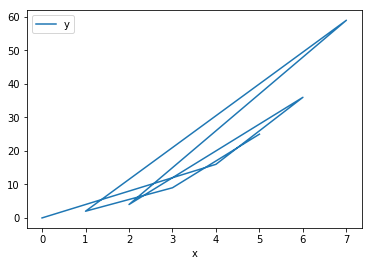

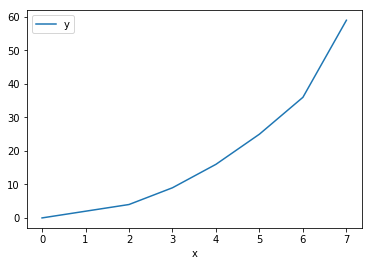

In [126]:
line_example=pd.DataFrame([[5,25],[3,9],[1,2],[7,59],[2,4],[6,36],[4,16],[0,0]],columns=['x','y'])
line_example.plot(kind='line',x='x',y='y')
plt.show()
line_example.sort_values('x').plot(kind='line',x='x',y='y')
plt.show()

#### Scatterplots e clusters

* [Referência](./seaborn.ipynb#graficos_de_dispersao_scatterplots) no seaborn

Gráficos de dispersão (Scatterplots) consistem em usar os valores de dois campos como as coordenadas cartesianas em que se marcará um ponto para cada ítem do conjunto de dados.

Scatterplots são excelentes para visualizarmos [Clusters](https://en.wikipedia.org/wiki/Cluster_analysis), ou seja, encontrarmos os limites entre as diferentes classes que buscamos nessas variáveis (se eles existirem). Às vezes, padrões que não esperávamos ou conseguimos visualizar de antemão ficam óbvios no gráfico. Muitas vezes, os gráficos de dispersão não vão apresentar classes muito bem divididas, mas isso só quer dizer que as variáveis escolhidas não são boas preditoras das classes. Com as escolhas corretas, o resultado é incrivelmente útil.

Pontos para prestar atenção:
* É uma boa ideia fazer um [heatmap](#heatmaps_e_correlacoes) das correlações entre os campos antes de decidir que campos usar como as coordenadas do Scatterplot, pois alguns fenômenos podem ocorrer:
    * Se a correlação entre os campos for alta, os pontos, por definição, estarão mais comprimidos perto de uma linha reta.
    * Se a correlação entre os campos for baixa, os pontos estarão mais distribuídos pelo espaço.
* Ambas as situações podem favorecer ou desfavorecer a visualização das classes. Isso depende muito da situação. É, porém, positivo ter essa relação de dispersão e correlação em mente ao decidir os campos para entender melhor os resultados.

No exemplo abaixo, usamos um dataset de lírios. Fazemos primeiro um Scatterplot com os dois campos com maior correlação e depois um com os de menor correlação (heatmap no final). As cores correspondem às classes (espécies de lírio). Observe como podemos diferenciá-las bem pela posição.

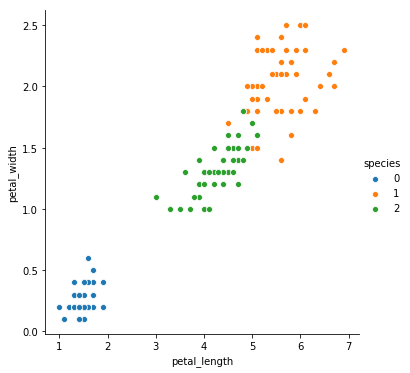

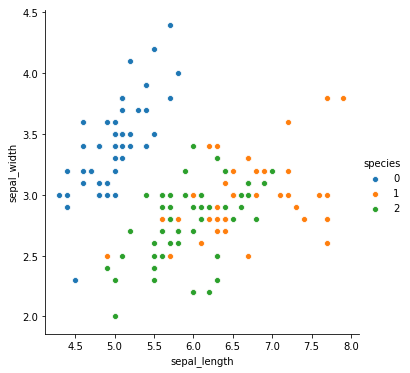

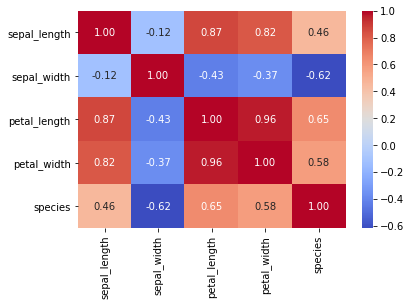

In [165]:
sns.pairplot(x_vars=['petal_length'],y_vars='petal_width',data=iris,hue='species',size=5)
plt.show()
sns.pairplot(x_vars=['sepal_length'],y_vars='sepal_width',data=iris,hue='species',size=5)
plt.show()
sns.heatmap(iris.corr(), annot=True, fmt='.2f',cmap ='coolwarm')
plt.show()

#### Heatmaps e correlações
* [Referência no seaborn](./seaborn#heatmaps)

Heatmaps associam dois valores (representados pela posição dos setores) a um terceiro (representado pela cor dos setores).
Esses mapas são normalmente utilizados para:
* Comparar estatísticas dos campos (ex:correlação);
* Visualizar dados tridimensionais (ex: distribuição geográfica de renda)

Podemos gerar heatmaps utilizando tanto a biblioteca matplotlib quanto a seaborn. Fazê-los no seaborn é trivial, pois há uma função específica para isso (Vide ["Heatmaps"](./seaborn#heatmaps)), já na matplotlib devemos usar uma função mais genérica com alguns parâmetros.

A biblioteca pandas nos oferece uma função útil para calcular a correlação entre os campos de um DataFrame: `DataFrame.corr()`.

Os exemplos abaixo utilizarão dois datasets:
* direto
    * Um exemplo para esclarecer a ideia de correlação
        * Esse dataset contém 5 campos:
            * a: Um número qualquer;
            * b: Duas vezes esse número;
            * c: O quadrado desse número;
            * d: Um número aleatório não relacionado aos outros;
            * l: A soma de a,b e c.
        * Idealmente, conseguiremos visualizar que há uma forte correlação entre 'a','b','c' e 'l' (podemos usar qualquer um para prever os outros, o que faz sentido, pois eles são diretamente dependentes uns dos outros) e uma baixa correlação entre todos e o campo 'd'.

* titanic
    * Um exemplo prático. Nele temos dados dos passageiros a bordo do navio 'Titanic' em seu naufrágio.
    * Esse dataset contém 6 campos:
        * Survived: '1' se o passageiro sobreviveu ao naufrágio. '0' se não;
        * Pclass: A classe das acomodações do passageiro;
        * Age: A idade do passageiro;
        * Siblings/Spouses Aboard: Número de irmãos/cônjuges do passageiro à bordo;
        * Parents/Children Aboard: Número de pais/filhos do passegeiro à bordo;
        * Sex: Sexo do passageiro;
        * Fare: Preço pago pelo passageiro pela passagem;
        * Age: Idade do passageiro.
    * Idealmente, conseguiremos visualizar uma correlação razoável entre 'Survived' e os campos 'Sex', 'Pclass' e 'Fare', por exemplo.

    Estaremos visualizando os seguintes dados:

In [127]:
titanic_corr=titanic.corr()
direto_corr=direto.corr()

##### Usando a matplotlib

A referência da biblioteca descreve um método para tal. Vide ["Creating Annotated Heatmaps"](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html).


Resumindo o método, usamos a função `imshow` e definimos os 'labels' para cada setor manualmente. Idealmente não usaremos esse método, mas sim a biblioteca Seaborn.

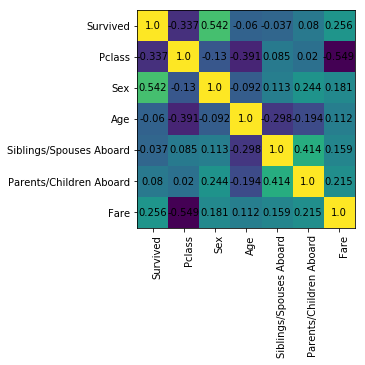

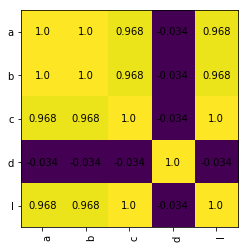

In [128]:
def mapa_correlacao(data):
    fig, ax = plt.subplots()
    im = ax.imshow(data.values,interpolation='nearest')

    #Configuramos as legendas
    ax.set_xticks(np.arange(len(data.columns.values)))
    ax.set_yticks(np.arange(len(data.columns.values)))
    ax.set_xticklabels(data.columns.values)
    ax.set_yticklabels(data.columns.values)

    #Rotacionamos as legendas inferiores
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

    #Adicionamos os valores dos setores
    for i in range(len(data.columns.values)):
        for j in range(len(data.columns.values)):
            text = ax.text(j, i, round(data.values[i][j],3),
                           ha="center", va="center", color="k")
    plt.show()
mapa_correlacao(titanic_corr)
mapa_correlacao(direto_corr)

##### Usando a seaborn

Seguindo ["essa"](./seaborn#Heatmaps) referência:

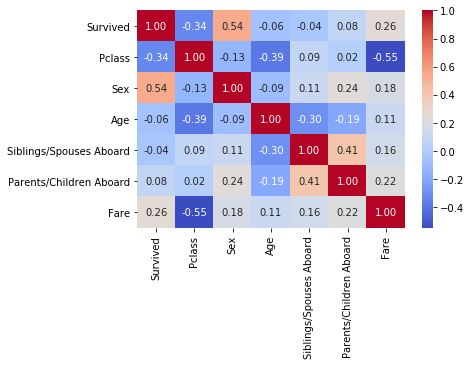

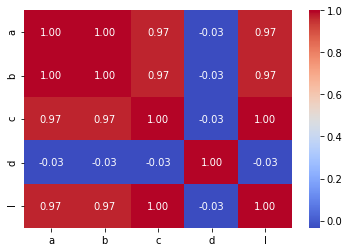

In [129]:
sns.heatmap(titanic_corr, annot=True, fmt='.2f',cmap ='coolwarm')
plt.show()
sns.heatmap(direto_corr, annot=True, fmt='.2f',cmap ='coolwarm')
plt.show()

Referências:
* [Notebook de matplotlib](./matplotlib.ipynb)
* [Notebook de seaborn](./seaborn.ipynb)
* [Exemplo de competição](../../competitions/titanic.ipynb)
* Técnicas intuitivas aprendidas por tentativa-e-erro.